### SPRINT 4 TASCA 02: Visualització gràfica de múltiples variables. Pre-processat 

- **Exercici 2**

Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

->PRE-PROCESSING-DATA/movies.dat

Important

El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula!


- **Exercici 3**

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.


## Exercici 2
<div class="alert alert-block alert-info">Fes les tasques de preprocessat  i adequació del Dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA amb l'objectiu de preparar-lo i treballar-lo com a dataframe per a extreure'n informació.

->PRE-PROCESSING-DATA/movies.dat

Important

El resultat final ha de ser un dataframe amb les variables de nom de la pel·lícula, any i genere. També és important quedar-se amb un sol gènere per a cada pel·lícula! 
</div>

In [334]:
# importing libraries
import pandas as pd 
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline
from IPython.display import Image ##use the IPython Image object to display an Image
##To Plot interactively within an IPython notebook
%matplotlib inline 
import matplotlib.image as mpimg
from IPython.display import Image ##use the IPython Image object to display an Image
from PIL import Image


from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import warnings

warnings.filterwarnings('ignore')

- Per obrir l'arxiu movies.dat, he tingut problemes perque jupyter no me'l deixava llegir com a csv amb el delimiter que toca perque diu que no està codificat amb UTF-8.
- Per tant, he utilitzat una funció interna de Python que permet crear, llegir i escriure arxius.
- Hi ha varies opcions:
    - Llegir linia per linia (readlines()), tot i que aquesta opció és valida per arxius petit ja que coloca tota la lectura a la memoria.
    - Llegir l'arxiu linia per linia amb un bule for i aplicar list comprehension. Aqui utilitzaré aquest mètode.
        (**Read a File Line by Line using for loop and list comprehension:** A list comprehension consists of brackets containing the expression, which is executed for each element along with the for loop to iterate over each element. Here, we will read the text file and print the raw data including the new line character in another output we removed all the new line characters from the list.)
        
        
- Despres faré una llista amb totes les linies que posterirorment passaré a dataframe

In [303]:
with open('movies.dat') as f:
    lines = [line.rstrip('\n') for line in f]
    rows = list(lines)
f.close()

In [304]:
#Creo un data frame i li dono nom a la columna
df_movies = pd.DataFrame(rows, columns= ['All'])
df_movies

,All
0,1::Toy Story (1995)::Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy
2,3::Grumpier Old Men (1995)::Comedy|Romance
3,4::Waiting to Exhale (1995)::Comedy|Drama
4,5::Father of the Bride Part II (1995)::Comedy
...,...
3878,3948::Meet the Parents (2000)::Comedy
3879,3949::Requiem for a Dream (2000)::Drama
3880,3950::Tigerland (2000)::Drama
3881,3951::Two Family House (2000)::Drama


- Ara vull separar les diferents columnes, utilitzant les funcions split, i regex

(https://chrisalbon.com/code/python/data_wrangling/pandas_regex_to_create_columns/)

In [305]:
# I use split method to create new columns, separating by ::
df_movies[['id','TitleYear', 'Genres']] = df_movies.All.str.split("::",expand=True,)
df_movies

,All,id,TitleYear,Genres
0,1::Toy Story (1995)::Animation|Children's|Comedy,1,Toy Story (1995),Animation|Children's|Comedy
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3::Grumpier Old Men (1995)::Comedy|Romance,3,Grumpier Old Men (1995),Comedy|Romance
3,4::Waiting to Exhale (1995)::Comedy|Drama,4,Waiting to Exhale (1995),Comedy|Drama
4,5::Father of the Bride Part II (1995)::Comedy,5,Father of the Bride Part II (1995),Comedy
...,...,...,...,...
3878,3948::Meet the Parents (2000)::Comedy,3948,Meet the Parents (2000),Comedy
3879,3949::Requiem for a Dream (2000)::Drama,3949,Requiem for a Dream (2000),Drama
3880,3950::Tigerland (2000)::Drama,3950,Tigerland (2000),Drama
3881,3951::Two Family House (2000)::Drama,3951,Two Family House (2000),Drama


In [306]:
# A la columna 'Titleyear', extrec l'any amb els parentessis, i el poso en una nova columna
##Ho trec amb parentesis, perquè és el patró que segueix l'any, m'he trobat que extreia els 4 primers digits de la linia
##que podien estar dins del titol
df_movies['Year'] = df_movies['TitleYear'].str.extract('(\(\d\d\d\d\))', expand=True)
##Despres elimino els parentesis de la columna any
df_movies['Year'] = df_movies['Year'].str.replace('[\(\)]', '')
##També trec l'any i els parentesis de la coluna title
df_movies['Title'] = df_movies['TitleYear'].str.replace('(\(\d\d\d\d\))', '')

df_movies

,All,id,TitleYear,Genres,Year,Title
0,1::Toy Story (1995)::Animation|Children's|Comedy,1,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Jumanji
2,3::Grumpier Old Men (1995)::Comedy|Romance,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men
3,4::Waiting to Exhale (1995)::Comedy|Drama,4,Waiting to Exhale (1995),Comedy|Drama,1995,Waiting to Exhale
4,5::Father of the Bride Part II (1995)::Comedy,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II
...,...,...,...,...,...,...
3878,3948::Meet the Parents (2000)::Comedy,3948,Meet the Parents (2000),Comedy,2000,Meet the Parents
3879,3949::Requiem for a Dream (2000)::Drama,3949,Requiem for a Dream (2000),Drama,2000,Requiem for a Dream
3880,3950::Tigerland (2000)::Drama,3950,Tigerland (2000),Drama,2000,Tigerland
3881,3951::Two Family House (2000)::Drama,3951,Two Family House (2000),Drama,2000,Two Family House


- Aqui vull separar els generes i quedar-me nomès amb el primer en una nova columna
- Per tal de fer-ho, utilitzaré un split i colocareé tots els gnerese en noves columnes. Ho faig així i no directament sobre el datframe de movies, perque no se fins a quants generes hi ha

In [156]:
##Vull extreure el primer genere de la columna generes.
##Faig un split per les pips (|) i col.loco cadascun en una nova columna d'un nou dataframe
df_moviesGenres = df_movies.Genres.str.split("|",expand=True,)
df_moviesGenres


,0,1,2,3,4,5
0,Animation,Children's,Comedy,None,None,None
1,Adventure,Children's,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None
...,...,...,...,...,...,...
3878,Comedy,None,None,None,None,None
3879,Drama,None,None,None,None,None
3880,Drama,None,None,None,None,None
3881,Drama,None,None,None,None,None


In [157]:
##Canvio el nom de la primera columna que és amb la que em quedaré
df_moviesGenres = df_moviesGenres.rename(columns={0: "Genre1"})
df_moviesGenres

,Genre1,1,2,3,4,5
0,Animation,Children's,Comedy,None,None,None
1,Adventure,Children's,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None
...,...,...,...,...,...,...
3878,Comedy,None,None,None,None,None
3879,Drama,None,None,None,None,None
3880,Drama,None,None,None,None,None
3881,Drama,None,None,None,None,None


In [158]:
##Afegeixo la columna de Genre1 al meu dataframe de pelicules
df_movies2 = pd.concat([df_movies, df_moviesGenres['Genre1']], axis=1)
df_movies2

,All,id,TitleYear,Genres,Year,Title,Genre1
0,1::Toy Story (1995)::Animation|Children's|Comedy,1,Toy Story (1995),Animation|Children's|Comedy,1995,Toy Story,Animation
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,2,Jumanji (1995),Adventure|Children's|Fantasy,1995,Jumanji,Adventure
2,3::Grumpier Old Men (1995)::Comedy|Romance,3,Grumpier Old Men (1995),Comedy|Romance,1995,Grumpier Old Men,Comedy
3,4::Waiting to Exhale (1995)::Comedy|Drama,4,Waiting to Exhale (1995),Comedy|Drama,1995,Waiting to Exhale,Comedy
4,5::Father of the Bride Part II (1995)::Comedy,5,Father of the Bride Part II (1995),Comedy,1995,Father of the Bride Part II,Comedy
...,...,...,...,...,...,...,...
3878,3948::Meet the Parents (2000)::Comedy,3948,Meet the Parents (2000),Comedy,2000,Meet the Parents,Comedy
3879,3949::Requiem for a Dream (2000)::Drama,3949,Requiem for a Dream (2000),Drama,2000,Requiem for a Dream,Drama
3880,3950::Tigerland (2000)::Drama,3950,Tigerland (2000),Drama,2000,Tigerland,Drama
3881,3951::Two Family House (2000)::Drama,3951,Two Family House (2000),Drama,2000,Two Family House,Drama


- Creo finalment un data fram amb les columnes que vull conservar

In [159]:
##Creo el dataframe final amb les columnes que vull
moviesDF = df_movies2[['Title', 'Year', 'Genre1']]
moviesDF

,Title,Year,Genre1
0,Toy Story,1995,Animation
1,Jumanji,1995,Adventure
2,Grumpier Old Men,1995,Comedy
3,Waiting to Exhale,1995,Comedy
4,Father of the Bride Part II,1995,Comedy
...,...,...,...
3878,Meet the Parents,2000,Comedy
3879,Requiem for a Dream,2000,Drama
3880,Tigerland,2000,Drama
3881,Two Family House,2000,Drama


<div class="alert alert-warning alert-warning"> Començo la meva exploració de les dades:</div>

In [160]:
moviesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   3883 non-null   object
 1   Year    3883 non-null   object
 2   Genre1  3883 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


- Veig que la columna Years està com a objecte, així què, la converteixo en un numero

In [161]:

##Utilitzo la funció to_numeric obn puc especificar que passa si troba errors, col.locant-los com Nans
moviesDF['Year'] = pd.to_numeric(moviesDF['Year'], errors='coerce') ##If ‘coerce’, then invalid parsing will be set as NaN.
print(moviesDF.dtypes)

Title     object
Year       int64
Genre1    object
dtype: object


- Busco si hi ha Nulls

In [162]:
moviesDF.isnull().sum()

Title     0
Year      0
Genre1    0
dtype: int64

- Miro una mica com és la columna de generes

In [163]:
moviesDF.Genre1.unique()

array(['Animation', 'Adventure', 'Comedy', 'Action', 'Drama', 'Thriller',
       'Crime', 'Romance', "Children's", 'Documentary', 'Sci-Fi',
       'Horror', 'Western', 'Mystery', 'Film-Noir', 'War', 'Fantasy',
       'Musical'], dtype=object)

- Miro graficament la densitat de cada genere

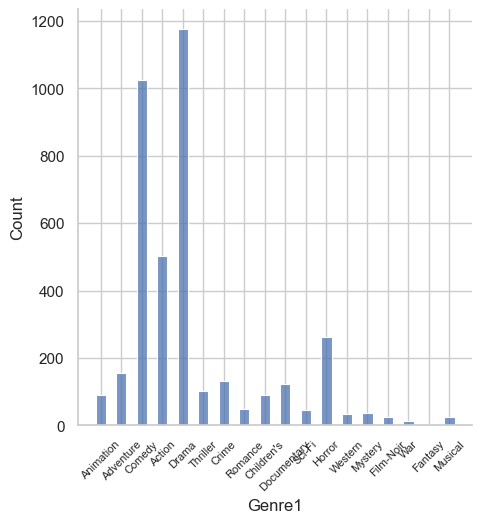

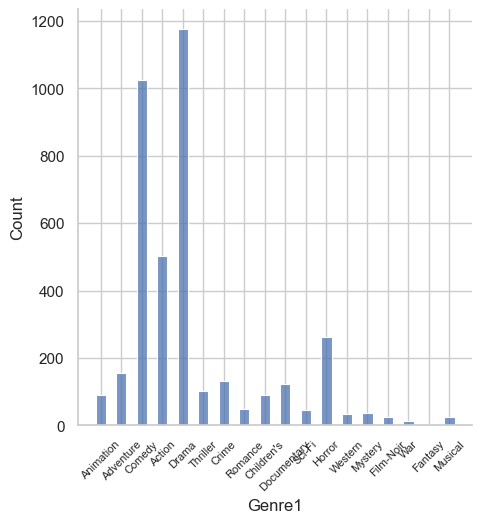

In [165]:
g = sns.displot(moviesDF, x="Genre1", shrink=0.5)
plt.xticks(fontsize=8)
g.set_xticklabels(rotation = 45);
plt.show()

- Observem clarament que les pelicules amb genere d'acció, d'aventura, comedia i horror, són les que tenen més entrades.
- Mentres que musical, i sorprenentment guerra, les que menys. 

- Miro també la columna Year

In [166]:
moviesDF.Year.nunique()

81

In [167]:
moviesDF.Year.describe()

count    3883.000000
mean     1986.066959
std        16.895690
min      1919.000000
25%      1982.000000
50%      1994.000000
75%      1997.000000
max      2000.000000
Name: Year, dtype: float64

- He tingut uns problemes en l'extracció de la columna any previs, així que comprovo que la columna year no tingui outliers desorbitats

In [190]:
##The first to present projected moving pictures to a paying audience 
##were the Lumière brothers in December 1895 in Paris, France. 
moviesDF.loc[moviesDF.Year <= 1895]

,Title,Year,Genre1


In [179]:
moviesDF.loc[moviesDF.Year > 2022]

,Title,Year,Genre1


- Miro la distribució en els anys de les pelicules

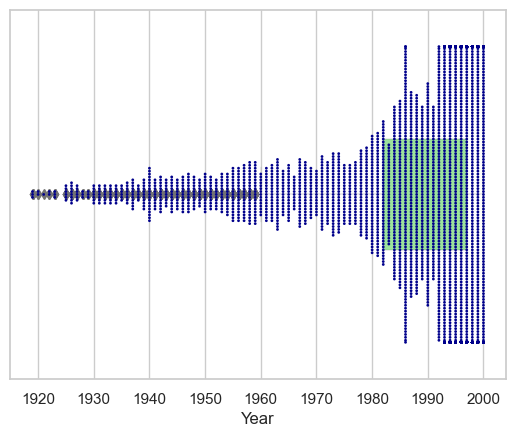

In [177]:
sns.set(style="whitegrid")
ax = sns.boxplot(data=moviesDF, x='Year', color='lightgreen', fliersize=5,  orient='v', linewidth=0.2 , width=0.3)
ax = sns.swarmplot(data=moviesDF, x='Year', orient='v', size=2, color='darkblue')
plt.show()

- Veiem què, com és lògic, des del 1980, amb l'accés generalitzat al la televisió fs'oincrementa moltissim el nombnre de pelicules.

- També ho miro en una grafica de densitat, en la que observaré el mateix resultat ( a baix)

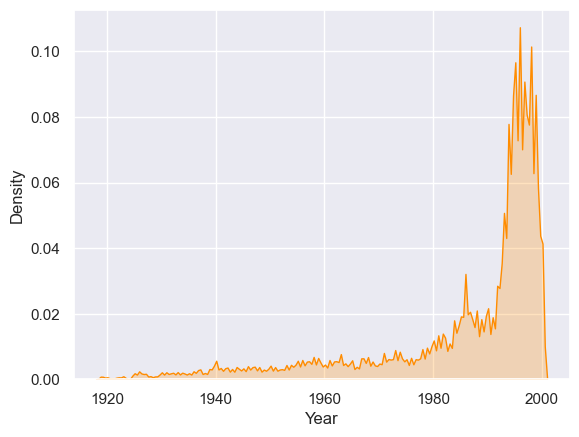

In [309]:
sns.set(style = 'darkgrid')
sns.kdeplot(moviesDF['Year'], shade = True, bw = 0.02, color = 'darkorange'); ##bw es la bin with per fefinar més o menys

- Miro també la distribució de pelicules per genere i any

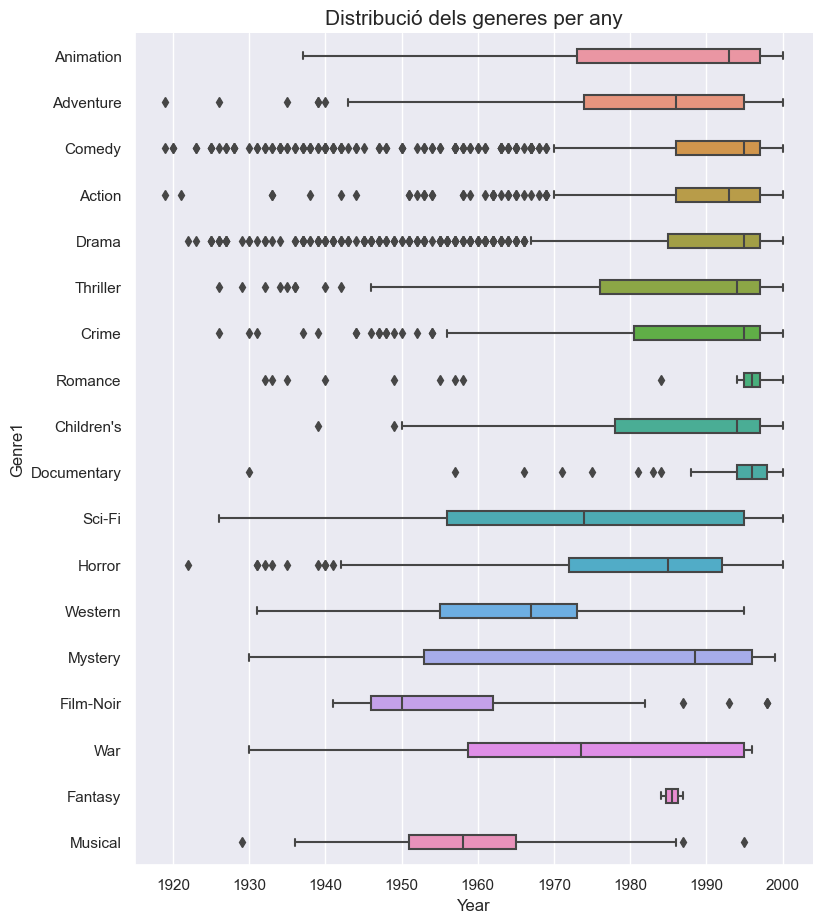

In [308]:
## Boxplot per categoria i any
g = sns.catplot(data=moviesDF, x='Year', y = 'Genre1', kind='box', fliersize=5,  width=0.3)
plt.title('Distribució dels generes per any', fontsize = 15)
g.fig.set_figwidth(10)
g.fig.set_figheight(10)
plt.show();

- Aqui observem com hi ha generes comuns a totes les èpoques, mentres altres generes, comencen més tard a apareixer.
- A més a més, amb la box en sí (Q25 i Q75), veiem que algunes és concentren molt, per exemple Film-Noir a la època dels40, 50 i 60, o el Musical als 50s i 60s, mentres altres i altres com misteri o sciencia ficció durant tot el rang d'anys.

## Exercici 3
<div class="alert alert-block alert-info">

Mostra la teva creativitat. Què creus rellevant mostrar del Dataset "movies.dat" de l'exercici anterior?

Fes una o dues representacions gràfiques i justifica la teva elecció.
</div>

- Vull veure aquest mateix gràfic del boxplot però amb grafiques de distribució, ja que tot i que el boxplot et dona moltissima informació estadistica, crec que una gràfica de densitat acaba sent més visual.
- Obviament aquests dos gràfgics es complementen i el box plot és molt més analitic.


- Per tal d'obtenir-lo utilitzaré un facetgrid, on plotejaré les distribucions dels diferents generes.

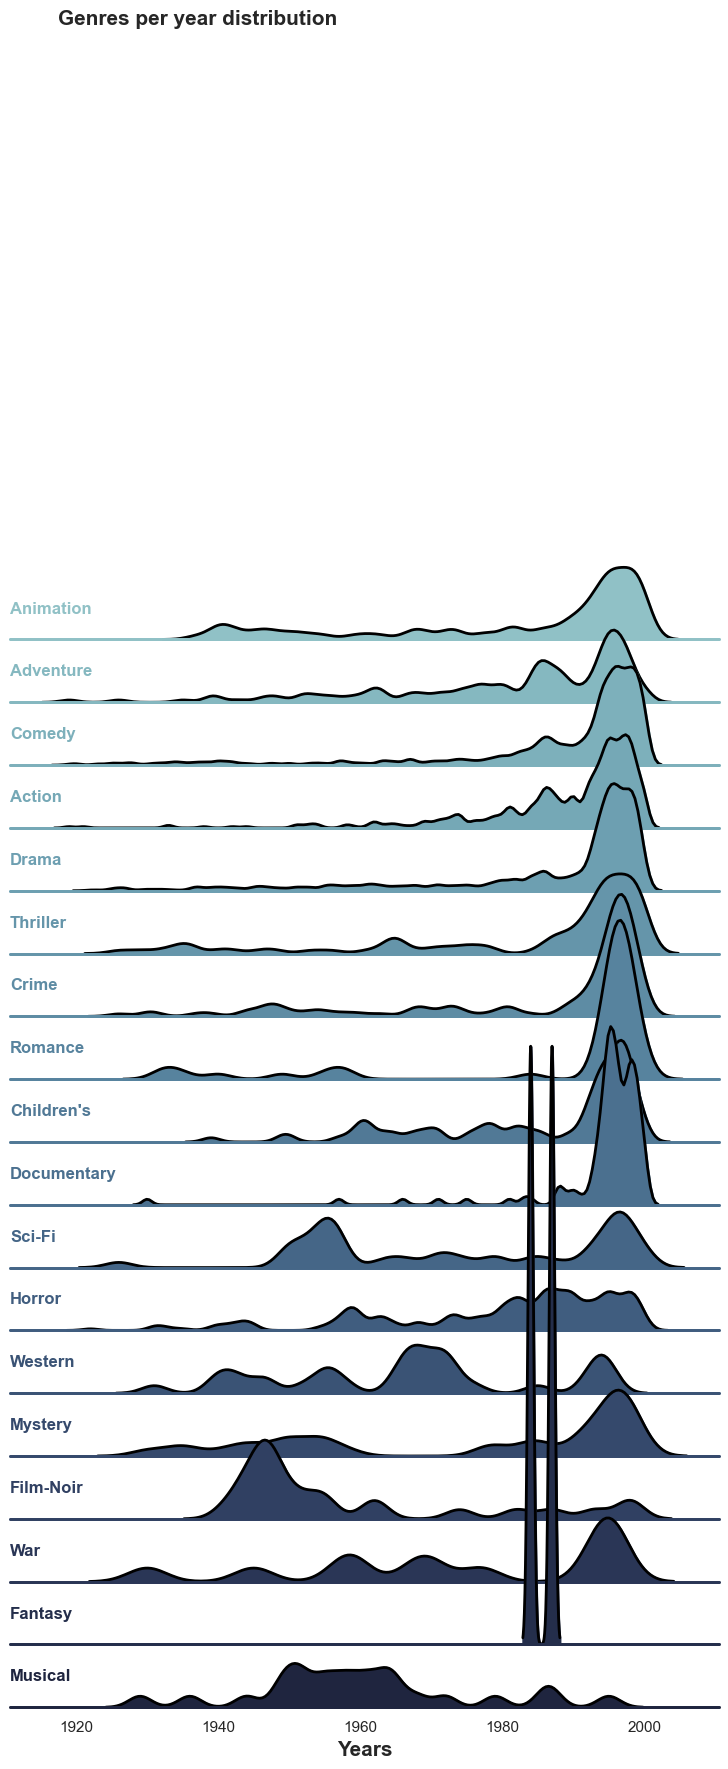

In [299]:
sns.set_theme(style='white', rc={"axes.facecolor": (0,0,0,0)})
##
pal = sns.cubehelix_palette(18, rot=-0.25, light=0.7)


#We creat the facet grid for the data set
g = sns.FacetGrid(moviesDF, row='Genre1', hue='Genre1', aspect = 8, height=1, palette=pal)
##Here we add the density kdeplots for each  genre
g.map(sns.kdeplot, 'Year', bw_adjust = 0.2, clip_on = False, fill = True, alpha = 1, linewidth = 1.5)
##hereHere, we addd a white line that represents athe contour of each kdeplot
g.map(sns.kdeplot, 'Year', bw_adjust = 0.2, clip_on = False, color = 'black', lw = 2)
##Passing color = Noe to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle='-', color=None, clip_on=False)
##Define and use a simple function to label the plot in axes coordinates
def label(x, color,label):
    ax=plt.gca()
    ax.text(0, 0.05, label, fontweight='bold', color= color, ha='left', va='center', transform=ax.transAxes)

g.map(label, 'Year')

##Here we add a horizontal line for each plot
g.map(plt.axhline, y = 0, lw = 2, clip_on = False)
##We use the mpl.Figure.subplots_adjust() function to get the subplots to overlap
g.figure.subplots_adjust(hspace = -0.90)

##Eventually, we remove axes titles, yticks and spines
g.set_titles('')
g.set(yticks=[], ylabel='')
g.despine(bottom=True, left=True)

#plt.setp(ax.get_xticklabels(), fontsize=15, fontweight='bold')
plt.xlabel('Years', fontsize=15, fontweight='bold')
g.fig.suptitle('Genres per year distribution', ha='right', fontsize=15, fontweight='bold')
plt.show()

- Mirant la gràfica observem clarament la distribució dels diferents generes en els anys, quan tenen pics de concentració
- També veiem que el genere Fantasy te 2 pics molt marcats que no havia observat abans, així que miro quines dades tenen aquest genere:

In [296]:
FantasyMovies = moviesDF.loc[moviesDF['Genre1'] == 'Fantasy']
FantasyMovies

,Title,Year,Genre1
782,"Hungarian Fairy Tale, A",1987,Fantasy
1952,Dune,1984,Fantasy


- El problema amb el genere fantassy es que nomès hi ha dues pelicules introduides, i donen dos pic molt grans ja que concentren el 100% de la densitat de dades, cada una és el 50%

##### Wordcloud
- Ara vull fer un analisis de les paraules que surten al titol. Aixi que faré un Wordcloud
    - Primer faig una inspecció de la columna Title

In [314]:
moviesDF.shape

(3883, 3)

In [312]:
moviesDF['Title'].nunique()

3841

- Veiem que hi ha títols duplicats.
- Vaig a buscar que passa amb aquests duplicats

In [375]:
## You can use duplicat without subset to check in the whole df. 
## With subset you just check in the specified column
##When we put keep=False duplate gives us all entries
moviesDF.duplicated(subset= 'Title', keep=False).sum() 

80

- Hi ha 80 Titols duplicats

In [376]:
##I sort the result by name so I can look at them
moviesDF.loc[moviesDF.duplicated(subset= 'Title', keep=False) == True].sort_values(by=['Title']) 

,Title,Year,Genre1
1346,101 Dalmatians,1996,Children's
2016,101 Dalmatians,1961,Animation
2443,"Ballad of Narayama, The (Narayama Bushiko)",1982,Drama
843,"Ballad of Narayama, The (Narayama Bushiko)",1958,Drama
1323,Cape Fear,1962,Film-Noir
...,...,...,...
2492,True Crime,1999,Crime
2484,Village of the Damned,1960,Horror
328,Village of the Damned,1995,Horror
3753,Wonderland,1999,Drama


- Veiem que hi ha repeticions, tot i així, sembla que la majoria són reedicions de les pelicules.
- Així que busquem si hi ha repetició en l'any i el Titol a la vegada

In [383]:
## Here I want to locate in the df a condiction, that the 2 columns have dubplicates equal true
moviesDF.loc[moviesDF[['Title', 'Year']].duplicated(keep=False) == True]


,Title,Year,Genre1


- Finalment veiem que tot i la repetició en els titolts no hi hja repetició en titol i any, aixi que donem la columna per bona ja que per el nostre analisis ha de contar el nombre de vegades que una paraula es repeteix

- Per tal de fer el wordcloud, importo primer les stopwords que no són les paraules tant importants que busco
- Col.loco totes les paraules juntes en un arxiu perque la funció les tingui totes juntes.
- Vull posar el wordcloud amb una mascara representativa, aixi que creo la mascara
- Finalment generaré el wordcloud amb el text, les stopwords i la mascara

In [348]:
##Importo Stopwords en angles i en español
stop_words_sp = set(stopwords.words('spanish'))
stop_words_en = set(stopwords.words('english'))

##Actualitzo la llista amb algunwes paraules sueltes que observo que surten a la imatge final
stop_words_en.update(["\'s", "\,", "\.", "La", "Le", "De"])

In [336]:
##Poso tots els titols en un sol arxiu text
text = " ".join(moviesDF['Title'])
text

"Toy Story  Jumanji  Grumpier Old Men  Waiting to Exhale  Father of the Bride Part II  Heat  Sabrina  Tom and Huck  Sudden Death  GoldenEye  American President, The  Dracula: Dead and Loving It  Balto  Nixon  Cutthroat Island  Casino  Sense and Sensibility  Four Rooms  Ace Ventura: When Nature Calls  Money Train  Get Shorty  Copycat  Assassins  Powder  Leaving Las Vegas  Othello  Now and Then  Persuasion  City of Lost Children, The  Shanghai Triad (Yao a yao yao dao waipo qiao)  Dangerous Minds  Twelve Monkeys  Wings of Courage  Babe  Carrington  Dead Man Walking  Across the Sea of Time  It Takes Two  Clueless  Cry, the Beloved Country  Richard III  Dead Presidents  Restoration  Mortal Kombat  To Die For  How to Make an American Quilt  Seven (Se7en)  Pocahontas  When Night Is Falling  Usual Suspects, The  Guardian Angel  Mighty Aphrodite  Lamerica  Big Green, The  Georgia  Kids of the Round Table  Home for the Holidays  Postino, Il (The Postman)  Confessional, The (Le Confessionnal)  I

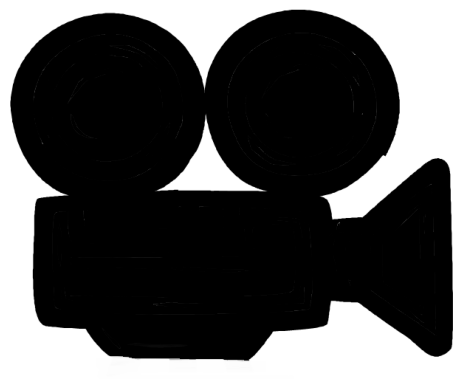

In [335]:
##Vull fer que les paraules surtin en una imatge d'una camara super-8
##Creo la mascara amb una imatge en blanc in negre
oldCamaraBW_mask = np.array(Image.open("OldCamara_BW.png"))
plt.imshow(oldCamaraBW_mask)
plt.axis("off")
plt.show()

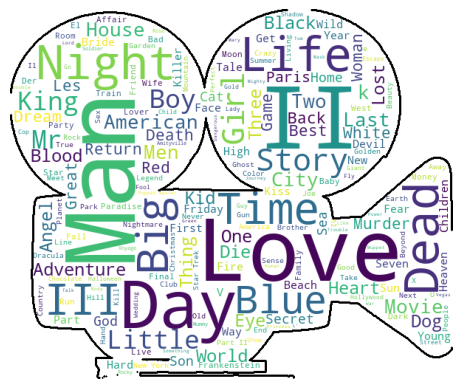

In [349]:
#Creo el wordcloud
wordcloud = WordCloud(background_color="white", 
                      mask=oldCamaraBW_mask,
                      contour_width=3, 
                      repeat=True,
                      min_font_size=3,
                      contour_color='black',
                     stopwords=stop_words_en)

# Genero el wordcloud
wordcloud.generate(text)

# El guardo en un arxiu
wordcloud.to_file("movieNames_wordcloud.png")

# show
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

 - Veiem clarament que les tres paraules que més apareixen són MAN, LOVE DAY i II, tot i així no és molt quantitatiu.
 - Per tal de fer un analisis més quantitatiu podria utilitzar Natural Language processing, to i que aquesta vegada no ho faré